# PRÁTICA GUIADA: Naive Bayes

## Introdução

#### Nesta prática vamos implementar um classificador do tipo [Naive Bayes](https://machinelearningmastery.com/classification-as-conditional-probability-and-the-naive-bayes-algorithm/) usando a biblioteca [scikit-learn](https://scikit-learn.org/stable/modules/naive_bayes.html).

#### Cada parâmetro de [Naive Bayes](https://towardsdatascience.com/naive-bayes-classifier-81d512f50a7c) representa a [probabilidade](https://www.investopedia.com/terms/b/bayes-theorem.asp) de pertencer a certa classe com determinado valor da `features` $X_{k}$.

#### No caso da classificação de um texto, o que é medido é a [probabilidade](https://brilliant.org/wiki/bayes-theorem/) de o texto pertencer a determinada classe dependendo da aparição ou não de determinada palavra. O produto de todas essas probabilidades é a probabilidade final de pertencer à classe.  

#### O que diferencia cada algoritmo de [Naive Bayes](https://towardsdatascience.com/all-about-naive-bayes-8e13cef044cf) é a [distribuição](https://inverseprobability.com/talks/notes/naive-bayes.html) adotada por eles para o processo de geração de cada uma das classes. Em sklearn temos:

1. [Gaussian Naive Bayes](https://towardsdatascience.com/learning-by-implementing-gaussian-naive-bayes-3f0e3d2c01b2)
2. [Multinomial Naive Bayes](https://medium.com/swlh/prediction-of-topics-using-multinomial-naive-bayes-classifier-2fb6f88e836f)
3. [Bernoulli Naive Bayes](https://iq.opengenus.org/bernoulli-naive-bayes/)


## Gaussian Naive Bayes

#### O primeiro passo para o estudo do método de classificação de [Naive Bayes]() é importar as bibliotecas necessárias:

- A biblioteca [`numpy`](https://numpy.org/) para fazer a manipulação dos dados.
- A biblioteca [`matplotlib.pyplot`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.html) para a exposição gráfica.
- A biblioteca [`seaborn`](https://seaborn.pydata.org/) também  para a exposição gráfica.
- A biblioteca [`sklearn.datasets.make_blobs`](https://scikit-learn.org/stable/datasets/index.html) para a obtenção de datasets.

#### A função [`sns.set()`](https://seaborn.pydata.org/generated/seaborn.set.html) define os parâmetros estéticos em uma única etapa, em que cada conjunto de parâmetros pode ser definido direta ou temporariamente.

#### A função [`make_blobs()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) gera [`blobs`](https://techterms.com/definition/blob) Gaussianos isotrópicos para agrupamento. os parâmetro `centers`, `random_state` e `cluster_std` definem, respectivamente, o número de centros a serem gerados ou os locais fixos dos centros, a geração de números aleatórios para criação de conjuntos de dados e o desvio padrão dos `clusters`. O `blob` criado será instanciado nos objetos `X` e `y`.
 
#### Geramos então classes com uma distribuição gaussiana. 

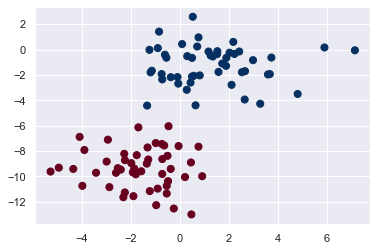

In [453]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs


X, y = make_blobs(n_samples = 100, 
                  n_features = 2, 
                  centers = 2, 
                  random_state = 2, 
                  cluster_std = 1.5
                 )
#print(X)
#print(y)
plt.scatter(X[:, 0], 
            X[:, 1], 
            c = y, 
            s = 50, 
            cmap = 'RdBu'
           );

####  <span style = "color:red">Código Original.</span>
<!---
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs


X, y = make_blobs(100, 
                  2, 
                  centers = 2, 
                  random_state = 2, 
                  cluster_std = 1.5
                 )
plt.scatter(X[:, 0], 
            X[:, 1], 
            c = y, 
            s = 50, 
            cmap = 'RdBu'
           );
-->

#### Vamos aplicar a este conjunto de dados um modelo do tipo Gaussian Naive Bayes: 

- Fazendo uso da biblioteca [`sklearn.naive_bayes.GaussianNB`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html). 

- Vamos instanciar um objeto `model` que receberá a o modelo Gaussiano, representado pela função [`GaussianNB()`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html), que depois deverá ajustar os pontos `X` e `y` com o auxílio do método [`.fit()`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB.fit).

In [454]:
# Ajustamos o modelo com os dados gerados
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X, y);

####  <span style = "color:red">Código Original.</span>
<!---
# Ajustamos o modelo com os dados gerados
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X, y);
-->

#### Queremos também gerar um espaço de pontos que abranja toda a área dos dados originais, para isso vamos popular nossa dispersão com pontos no intervalo inferior $[-6, -14]$ e $[14, 18]$ são os intervalos ocupados por cada uma das variáveis geradas. 

#### Vamos usar o método [`RandomState()`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.RandomState.html) para alocar o gerador de números pseudo-aleatórios do tipo [Mersenne Twister](https://en.wikipedia.org/wiki/Mersenne_Twister) e aplicar as definições de forma dadas pelo método [`.rand`](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.rand.html) em um arranjo $2000 \times 2$.

In [455]:
rng = np.random.RandomState(0)
X_new = [-6, -14] + [14, 18] * rng.rand(2000, 2)
y_pred = model.predict(X_new)

In [456]:
#print(X_new.max())
#print(X_new.min())
#print(X_new)
#print(y_pred.max())
#print(y_pred.min())

####  <span style = "color:red">Código Original.</span>
<!---
# -6 e -14 são os limites inferiores dos dados gerados pela função make_blobs
# 14 e 18 são os intervalos ocupados por cada uma das variáveis geradas
# Queremos gerar um espaço de pontos que abranja toda a área dos dados originais.

rng = np.random.RandomState(0)
X_new = [-6, -14] + [14, 18] * rng.rand(2000, 2)
y_pred = model.predict(X_new)
-->

#### Vamos usar a função [`.scatter()`](https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.scatter.html) para plotar a dispersão dos dados do [`blob`](https://en.wikipedia.org/wiki/Binary_large_object) gerados anteriormente, respeitando os parâmetros que representam:

* `c`, uma lista ou arranjo (opcional) de cores a serem aplicados aos pontos.
* `s`, o tamanho dos pontos
* `cmap`, a definição para o mapa de cores aplicados.
* `alpha`, a [mistura](https://en.wikipedia.org/wiki/Alpha_compositing#:~:text=Alpha%20blending%20is%20a%20convex,represents%20a%20fully%20opaque%20color) de cores para gerar níveis de opacidade dos pontos.

#### Depois, vamos à classificação definida pelo modelo sobre todo o espaço de dados, descrito pelos $2000$ pontos gerados acima. 

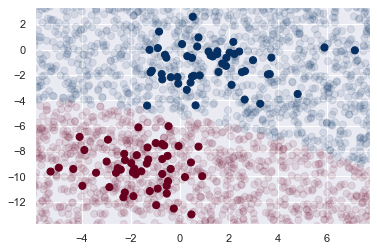

In [457]:
plt.scatter(X[:, 0], 
            X[:, 1], 
            c = y, 
            s = 50, 
            cmap = 'RdBu'
           )
lim = plt.axis()
plt.scatter(X_new[:, 0], 
            X_new[:, 1], 
            c = y_pred, 
            s = 50, 
            cmap = 'RdBu', 
            alpha = 0.1
           )
plt.axis(lim);

####  <span style = "color:red">Código Original.</span>
<!---
plt.scatter(X[:, 0], 
            X[:, 1], 
            c = y, 
            s = 50, 
            cmap = 'RdBu'
           )
lim = plt.axis()

plt.scatter(X_new[:, 0], 
            X_new[:, 1], 
            c = y_pred, 
            s = 50, 
            cmap = 'RdBu', 
            alpha = 0.1
           )
plt.axis(lim);
-->

#### No gráfico anterior observa-se o [`decision boundary`](https://towardsdatascience.com/decision-boundary-visualization-a-z-6a63ae9cca7d) do modelo que surgiu da hipótese de uma distribuição gaussiana sobre cada uma das classes nos dados de treinamento.

### Cálculo de probabilidades

#### Uma das vantagens deste modelo é que ele nos permite obter a probabilidade de pertencimento de um ponto a uma classe ou outra para cada ponto do domínio.

#### Para isso aplicamos a função [`predict_proba()`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB.predict_proba), que retorna as estimativas de probabilidade de retorno para o vetor de teste `X`.

In [458]:
yprob = model.predict_proba(X_new)
#print(yprob)
#yprob[-8:].round(2)
yprob[:].round(2)

array([[0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       ...,
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

##  <span style = "color:blue">Prática Independente.</span>

#### Aplique a função `make_blobs()` e crie uma distribuição de `200` pontos, com `4` centros. 

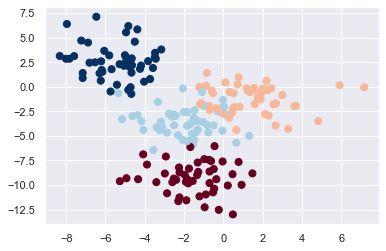

In [459]:
X1, y1 = make_blobs(n_samples = 200, 
                  n_features = 2, 
                  centers = 4, 
                  random_state = 2, 
                  cluster_std = 1.5
                 )
#print(X)
#print(y)
plt.scatter(X1[:, 0], 
            X1[:, 1], 
            c = y1, 
            s = 50, 
            cmap = 'RdBu'
           );

####  <span style = "color:red">Código Original.</span>
<!---
X_PI, y = make_blobs(200, 
                  2, 
                  centers = 4, 
                  random_state = 2, 
                  cluster_std = 1.5
                 )
#print(X)
#print(y)
plt.scatter(X_PI[:, 0], 
            X_PI[:, 1],
            c = y, 
            s = 50, 
            cmap = 'RdBu'
           );
-->

#### Instancie um objeto para receber um modelo de distribuição gaussiana para a classificação Naive Bayes e ajuste-o aos dados de treinamento.

In [460]:
# Ajustamos o modelo com os dados gerados
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X1, y1);

####  <span style = "color:red">Código Original.</span>
<!---
model = GaussianNB()
model.fit(X_PI, y);
-->

#### Gere novos dados para popular sua distribuição criando regiões de limites de decisão para o modelo realizar classificações/previsões. 

In [461]:
rng1 = np.random.RandomState(0)
X_new1 = [-6, -14] + [14, 18] * rng1.rand(2000, 2)
y_pred1 = model.predict(X_new1)

####  <span style = "color:red">Código Original.</span>
<!---
rng = np.random.RandomState(0)
#X_new = [-6, -14] + [14, 18] * rng.rand(2000, 2)
X_new_PI = [-12, -14] + [20, 22] * rng.rand(2000, 2)
y_pred = model.predict(X_new_PI)
-->

#### Plot os dados iniciais a serem classificados, bem como aqueles criados com o intuito de gerar regiões de limites de decisão.

In [462]:
X_new1[:, 0]

array([ 1.68338905,  2.43868727, -0.06883281, ..., -4.32134532,
        0.08823081,  7.05928655])

In [463]:
X_new1[:, 1]

array([-1.12659141, -4.19210271, -2.37390596, ..., -7.70649139,
        0.94005305, -8.44990818])

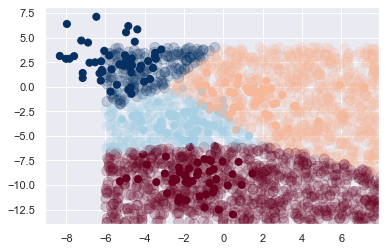

In [464]:
plt.scatter(X1[:, 0], 
            X1[:, 1], 
            c = y1, 
            s = 50, 
            cmap = 'RdBu'
           )
lim = plt.axis()
plt.scatter(X_new1[:, 0], 
            X_new1[:, 1], 
            c = y_pred1, 
            s = 100, 
            cmap = 'RdBu', 
            alpha = 0.2
           )
plt.axis(lim);

####  <span style = "color:red">Código Original.</span>
<!---
plt.scatter(X_PI[:, 0], 
            X_PI[:, 1], 
            c = y, 
            s = 50, 
            cmap = 'RdBu'
           )
lim = plt.axis()

plt.scatter(X_new_PI[:, 0], 
            X_new_PI[:, 1], 
            c = y_pred, 
            s = 50, 
            cmap = 'RdBu', 
            alpha = 0.1
           )
plt.axis(lim);
-->

#### Por fim, calcule as estimativas de probabilidade de retorno para o vetor de teste `X`.

In [465]:
yprob1 = model.predict_proba(X_new1)
#print(yprob)
#yprob[-8:].round(2)
yprob1[:].round(2)

array([[0.  , 0.99, 0.01, 0.  ],
       [0.  , 0.91, 0.09, 0.  ],
       [0.  , 0.62, 0.38, 0.  ],
       ...,
       [0.97, 0.  , 0.03, 0.  ],
       [0.  , 0.99, 0.01, 0.  ],
       [0.55, 0.45, 0.  , 0.  ]])

####  <span style = "color:red">Código Original.</span>
<!---
yprob = model.predict_proba(X_new_PI)
#print(yprob)
#yprob[-8:].round(2)
yprob[:].round(2)
-->

## Classificação de texto.

#### Para o seguinte exemplo, vamos baixar o conjunto de dados [`20newsgroup`](http://qwone.com/~jason/20Newsgroups/), que contém e-mails com pedidos de informações a diferentes empresas de mídia digital sobre diferentes assuntos.

### Acessando os dados.


#### Pra trabalhar com os dados de avaliação vamos:

- Importar a biblioteca [`sklearn.datasets.fetch_20newsgroups`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html) com os nomes de arquivos e dados do conjunto de dados de 20 grupos de notícias (classificação).


- Vamos também aplicar a função [`fetch_20newsgroups()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html#sklearn-datasets-fetch-20newsgroups) que carrega as informações em um objeto `meus_dados` do tipo [`Bunch`](https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html#sklearn.utils.Bunch). O objeto `bunch` é um objeto Container que expõe chaves como atributos. Estendem o conceito de dicionário permitindo que os valores sejam acessados por sua chave, `bunch["value_key"]`, ou por um atributo `bunch.value_key`.

In [466]:
from sklearn.datasets import fetch_20newsgroups

meus_dados = fetch_20newsgroups()
type(meus_dados)

sklearn.utils.Bunch

####  <span style = "color:red">Código Original.</span>
<!---
from sklearn.datasets import fetch_20newsgroups

meus_dados = fetch_20newsgroups()
type(meus_dados)
-->

#### Podemos acessar as chaves de nosso objeto `meus_dados`.

In [467]:
# Exploramos o objeto e vemos que o dataframe não tem nomes de colunas
meus_dados.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

####  <span style = "color:red">Código Original.</span>
<!---
meus_dados.keys()
-->

#### Podemos checar o comprimento de cada um dos elementos do objeto `bunch`.

In [468]:
len(meus_dados.data)
#len(meus_dados.filenames)
#len(meus_dados.target_names)
#len(meus_dados.target)
#len(meus_dados.DESCR)

11314

#### É importante observar a composição do objeto `meus_dados`, o objeto em questão é composto por listas em que cada elemento da mesma é uma seqüência de `strings`.

In [469]:
print(type(meus_dados.data),'O corpus de textos é uma lista')
print(type(meus_dados.data[0]),'Cada item da lista é uma sequência')

<class 'list'> O corpus de textos é uma lista
<class 'str'> Cada item da lista é uma sequência


####  <span style = "color:red">Código Original.</span>
<!---
print(type(meus_dados.data),'O corpus de textos é uma lista')
print(type(meus_dados.data[0]),'Cada item da lista é uma sequência')
-->

#### Vamos acessar o corpus de texto e outros elementos da posição [0], vejamos:

In [470]:
print(meus_dados.data[0])
#print(meus_dados.filenames[0])
#print(meus_dados.target_names[0])
#print(meus_dados.target[0])
#print(meus_dados.DESCR[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







####  <span style = "color:red">Código Original.</span>
<!---
# Vejamos o primeiro texto do corpus
print(meus_dados.data[0])
-->

#### Vejamos agora em quais classes os dados são divididos.

In [471]:
meus_dados['target_names']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

####  <span style = "color:red">Código Original.</span>
<!---
meus_dados.target_names
-->

### `Split train-test` e simplificação do `dataframe`.

#### Para facilitar o problema de classificação, vamos ficar só com algumas das categorias que contêm os dados. Os objetos do tipo `bunch` permitem essa separação pode meio da aplicação dos parâmetros: 

- `subset`: que seleciona o conjunto de dados a ser carregado: `train` para o conjunto de treinamento, `test` para o conjunto de testes ou `all` para ambos, com a ordem aleatória. 

- `categories`: que carrega todas as categorias (None) por padrão ou uma lista de nomes de categorias. 

In [472]:
categories = ['talk.religion.misc', 
              'soc.religion.christian', 
              'sci.space', 
              'comp.graphics'
             ]

train = fetch_20newsgroups(subset = 'train', 
                           categories = categories
                          )

test = fetch_20newsgroups(subset = 'test', 
                          categories = categories
                         )

####  <span style = "color:red">Código Original.</span>
<!---
categories = ['talk.religion.misc', 
              'soc.religion.christian', 
              'sci.space', 
              'comp.graphics'
             ]

train = fetch_20newsgroups(subset = 'train', 
                           categories = categories
                          )
test = fetch_20newsgroups(subset = 'test', 
                          categories = categories
                         )
-->

#### Podemos conferir o comprimento de ambos os vetores.

In [473]:
print('Train Length:', len(train.data))
print('Test Length:', len(test.data))

Train Length: 2153
Test Length: 1432


####  <span style = "color:red">Código Original.</span>
<!---
print('Train Length:', len(train.data))
print('Test Length:', len(test.data))
-->

### Feature Engineering.

#### Para poder implementar um modelo de previsão, precisamos transformar cada um dos documentos de texto pertencentes ao `corpus` em uma matriz de features.

#### Para isso, vamos importar a biblioteca [`sklearn.feature_extraction.text.TfidfVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) e aplicar a função [`TfidfVectorizer()`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html). 

#### Ela tenta vetorizar um `corpus` de textos contando a ocorrência de cada palavra em cada documento. Primeiro, procuram-se todas as palavras existentes no corpus, e depois é computada a quantidade de aparições em cada documento. Esse processo é denominado [word count](https://kavita-ganesan.com/tfidftransformer-tfidfvectorizer-usage-differences/).

#### O problema dessa abordagem é a existência de palavras que aparecem com muita frequência em um texto, mas contribuem com pouco valor para a classificação: projeta-se que palavras como “a”, “o” ou “do” apareçam muitas vezes em todos os documentos. 

#### O que o `TfidfVectorizer()` faz é calcular a frequência de aparição de um termo em um documento ponderada segundo a aparição no restante do `corpus` a fim dar mais peso aos termos que diferenciam cada documento dos outros.

#### Você pode estudar os processos de [extração](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction) e [implementacão](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html).

In [474]:
# Geramos o modelo e o aplicamos aos dados de treinamento

from sklearn.feature_extraction.text import TfidfVectorizer

modelo_tfidf = TfidfVectorizer()

X_train = modelo_tfidf.fit_transform(train.data)

####  <span style = "color:red">Código Original.</span>
<!---
# Geramos o modelo e o aplicamos aos dados de treinamento

from sklearn.feature_extraction.text import TfidfVectorizer

modelo_tfidf = TfidfVectorizer()

X_train = modelo_tfidf.fit_transform(train.data)
-->

#### Podemos avaliar a forma dos dados de treino após a aplicação do método de ajuste e transformação `fit_transform`  aplicados aos dados.

In [475]:
# Vejamos a transformação feita sobre os dados
print(X_train.shape)

(2153, 35329)


####  <span style = "color:red">Código Original.</span>
<!---
# Vejamos a transformação feita sobre os dados
print(len(train.data))
print(X_train.shape)
-->

#### Note que `X_train` é um objeto do tipo [`scipy.sparse.csr_matrix`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html), uma matriz de linha esparsa comprimida.

In [476]:
type(X_train)

scipy.sparse.csr.csr_matrix

In [477]:
X_train

<2153x35329 sparse matrix of type '<class 'numpy.float64'>'
	with 352179 stored elements in Compressed Sparse Row format>

####  <span style = "color:red">Código Original.</span>
<!---
# Vejamos que tipo de dados X contém
type(X_train)
-->

#### Uma matriz dispersa conserva unicamente os valores diferentes de `0`, o atributo [`.size`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.size.html) nos retorna o número de elementos. 

In [478]:
X_train.size

352179

####  <span style = "color:red">Código Original.</span>
<!---
X_train.size
-->

#### A seguir vamos converter a matriz esparsa em um arranjo `numpy`, para coletar todos os elementos pertinentes. Observe a diferença de tamanho entre a matriz esparsa `X_train` e o arranjo `numpy`.

In [479]:
# Quando transformamos a matriz em array, a quantidade de elementos é multiplicada várias vezes
#type(X_train.toarray())
X_train.toarray().size

76063337

####  <span style = "color:red">Código Original.</span>
<!---
# Quando transformamos a matriz em array, a quantidade de elementos é multiplicada várias vezes
#type(X_train.toarray())
X_train.toarray().size
-->

#### O método [`.get_feature_names()`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer.get_feature_names) realiza o mapeamento da matriz de índices inteiros de atributos para o nome dos atributos, retornando uma lista de nomes de atributos.

In [480]:
# Vejamos as primeiras e últimas features construídas pelo modelo
modelo_tfidf.get_feature_names()[0: 10000]

['00',
 '000',
 '0000',
 '00000',
 '000000',
 '000005102000',
 '000021',
 '000062david42',
 '0000vec',
 '0001',
 '000100255pixel',
 '00041032',
 '0004136',
 '0004246',
 '0004422',
 '00044513',
 '0004847546',
 '0005',
 '0007',
 '00090711',
 '000usd',
 '0010580b',
 '0012',
 '001200201pixel',
 '0014',
 '001428',
 '001555',
 '001718',
 '001757',
 '0018',
 '00196',
 '002',
 '0020',
 '0022',
 '0028',
 '0029',
 '0033',
 '0034',
 '003719',
 '0038',
 '0039',
 '0049',
 '006',
 '00630',
 '0065',
 '0094',
 '0098',
 '00index',
 '00pm',
 '01',
 '0100',
 '010326',
 '010329',
 '010734',
 '010821',
 '011033',
 '011605',
 '011634edt',
 '011720',
 '012537',
 '0131',
 '013846',
 '014305',
 '014506',
 '01463',
 '0150',
 '01580',
 '01609',
 '01742',
 '01752',
 '01776',
 '0179',
 '01821',
 '01826',
 '0184',
 '01852',
 '01854',
 '01890',
 '018b',
 '0192',
 '0199',
 '01a',
 '01wb',
 '02',
 '020',
 '0200',
 '020021',
 '020259',
 '020359',
 '020637',
 '020655',
 '020751',
 '02115',
 '02138',
 '02139',
 '02142',


####  <span style = "color:red">Código Original.</span>
<!---
# Vejamos as primeiras e últimas features construídas pelo modelo
modelo_tfidf.get_feature_names()[0:30]
-->

#### Podemos também observar as últimas linhas com os nomes dos atributos encontrados.

In [481]:
modelo_tfidf.get_feature_names()[-30:]

['zoro',
 'zoroaster',
 'zoroastrian',
 'zoroastrianism',
 'zoroastrians',
 'zowie',
 'zrz',
 'zsoft',
 'zt',
 'zubin',
 'zuck',
 'zug',
 'zullen',
 'zulu',
 'zurbrin',
 'zurich',
 'zurvanism',
 'zvi',
 'zwaartepunten',
 'zwak',
 'zwakke',
 'zware',
 'zwart',
 'zwarte',
 'zxmkr08',
 'zyeh',
 'zyxel',
 'ªl',
 'º_________________________________________________º_____________________º',
 'ºnd']

####  <span style = "color:red">Código Original.</span>
<!---
modelo_tfidf.get_feature_names()[-30:]
-->

### Treinamento de um classificador Naive Bayes.

#### Com a matriz construída para os dados de treinamento, vamos importar a biblioteca [`sklearn.naive_bayes.MultinomialNB`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) que realiza a classificação [Naive Bayes](https://towardsdatascience.com/multinomial-na%C3%AFve-bayes-classifier-using-pointwise-mutual-information-9ade011fcbd0) para modelos multinomiais.

#### Assim podemos instanciar o modelo NB em objeto `modelo_NB` e treinar um classificador utilizando o modelo usando a função [`MultinomialNB()`](https://scikit-learn.org/stable/modules/naive_bayes.html#multinomial-naive-bayes) que implementa o algoritmo naive Bayes para dados distribuídos multinomialmente.

#### Depois será necessário ajustar os dados de treino `X_train` e de target `train.target` ao modelo NB.

In [482]:
from sklearn.naive_bayes import MultinomialNB
modelo_NB = MultinomialNB()
modelo_NB.fit(X_train, 
              train.target
             )

MultinomialNB()

In [483]:
X_train

<2153x35329 sparse matrix of type '<class 'numpy.float64'>'
	with 352179 stored elements in Compressed Sparse Row format>

In [484]:
train.target

array([2, 2, 1, ..., 2, 3, 1], dtype=int64)

####  <span style = "color:red">Código Original.</span>
<!---
from sklearn.naive_bayes import MultinomialNB
modelo_NB = MultinomialNB()
modelo_NB.fit(X_train, 
              train.target
             )
-->

### Previsão.

#### Com os parâmetros do modelo já calculados, vamos fazer previsões sobre os dados de teste. 

#### Para vetorizarmos os dados de teste temos que recorrer ao modelo `tf-idf` aplicado aos dados de treinamento. Aplicamos o método [`transform()`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer.transform), que transforma os documentos em matriz de documento-termo.

In [485]:
X_test = modelo_tfidf.transform(test.data)

####  <span style = "color:red">Código Original.</span>
<!---
X_test = modelo_tfidf.transform(test.data)
-->

#### Novamente, o objeto `X_test` é uma matriz esparsa tecnicamente definida como [`scipy.sparse.csr.csr_matrix`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html).

In [486]:
# Também é gerada uma matriz esparsa
type(X_test)

scipy.sparse.csr.csr_matrix

####  <span style = "color:red">Código Original.</span>
<!---
# Também é gerada uma matriz esparsa
type(X_test)
-->

#### Agora podemos realizar as previsões de nosso modelo com o auxílio do método [`.predict()`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB.predict), que executa a classificação em uma matriz de vetores de `test_X`.

In [487]:
# Com as features de teste transformadas calculamos as labels previstas
labels_pred = modelo_NB.predict(X_test)

####  <span style = "color:red">Código Original.</span>
<!---
# Com as features de teste transformadas calculamos as labels previstas
labels_pred = modelo_NB.predict(X_test)
-->

#### As classificações realizadas são armazenadas no objeto `labels_pred`.

In [488]:
labels_pred

array([2, 0, 1, ..., 1, 2, 1], dtype=int64)

####  <span style = "color:red">Código Original.</span>
<!---
labels_pred
-->

#### Os valores classificados estão associados às categorias a seguir, dadas pelo atributo `.target_names`:

In [489]:
# As labels estão ligadas às tags do objeto Bunch original
train.target_names

['comp.graphics', 'sci.space', 'soc.religion.christian', 'talk.religion.misc']

####  <span style = "color:red">Código Original.</span>
<!---
# As labels estão ligadas às tags do objeto Bunch original
train.target_names
-->

### Matriz de confusão.

#### Depois da classificação,  o próximo passo é criarmos a matriz de confusão entre a previsão e as observações originais.

#### Para isso vamos importar a biblioteca [`sklearn.metrics.confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) que avalia a precisão de uma classificação a partir do cruzamento entre os dados observados e classificados/previstos.

In [490]:
from sklearn.metrics import confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

####  <span style = "color:red">Código Original.</span>
<!---
from sklearn.metrics import confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
-->

#### Para gerar a matriz confusão precisamos aplicar a função [`confusion_matrix()`](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html) que avalia a qualidade da saída de um classificador.

In [491]:
test.target

array([3, 0, 1, ..., 1, 2, 0], dtype=int64)

In [492]:
labels_pred

array([2, 0, 1, ..., 1, 2, 1], dtype=int64)

In [493]:
# Imprimimos a matriz de confusão
mat = confusion_matrix(test.target, 
                       labels_pred
                      )
mat.shape
#type(mat)

(4, 4)

In [494]:
print(mat.T)
print(mat)

[[344   6   1   4]
 [ 13 364   5  12]
 [ 32  24 392 187]
 [  0   0   0  48]]
[[344  13  32   0]
 [  6 364  24   0]
 [  1   5 392   0]
 [  4  12 187  48]]


####  <span style = "color:red">Código Original.</span>
<!---
# Imprimimos a matriz de confusão
mat = confusion_matrix(test.target, 
                       labels_pred
                      )
mat.shape
#type(mat)
-->

#### Então a submetemos a matriz confusão a um mapa de calor, com o método [`.heatmap()`](https://seaborn.pydata.org/generated/seaborn.heatmap.html) que gera dados retangulares como uma matriz codificada por cores. 

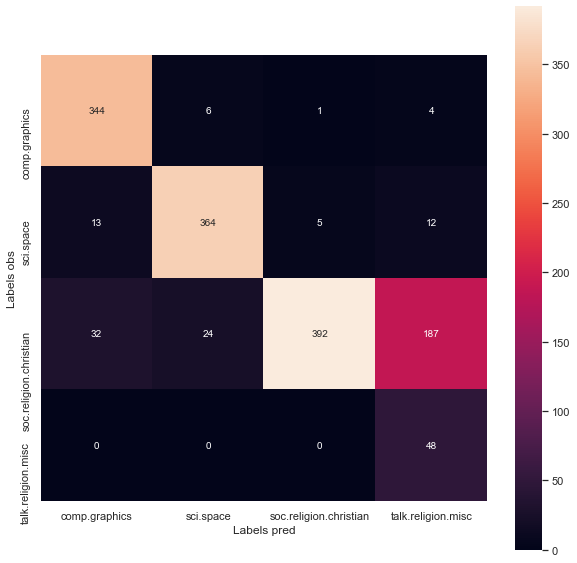

In [495]:
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize = (10, 10))
    ax = sns.heatmap(mat.T,
                     square = True,
                     annot = True,
                     fmt = 'd',
                     cbar = True,
                     xticklabels = train.target_names,
                     yticklabels = train.target_names,
                     cmap = None
                    )
plt.ylabel('Labels obs')
plt.xlabel('Labels pred');    

####  <span style = "color:red">Código Original.</span>
<!---
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize = (10, 10))
    ax = sns.heatmap(mat.T,
                     square = True,
                     annot = True,
                     fmt = 'd',
                     cbar = True,
                     xticklabels = train.target_names,
                     yticklabels = train.target_names,
                     cmap = None)
plt.ylabel('Labels obs')
plt.xlabel('Labels pred');
-->

#### Por fim importamos o biblioteca [`sklearn.metrics.accuracy_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) para calcularmos a acurácia de nosso modelo de classificação. 

#### Usamos a função [`accuracy_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score), que apresenta uma pontuação de classificação de precisão em que o conjunto de rótulos previsto para uma amostra deve corresponder exatamente ao conjunto de rótulos correspondente à observação.

In [496]:
# Primeiro, calculamos a accuracy geral do modelo
from sklearn.metrics import accuracy_score

accuracy_score(test.target, 
               labels_pred
              )

0.8016759776536313

####  <span style = "color:red">Código Original.</span>
<!---
# Primeiro, calculamos a accuracy geral do modelo
from sklearn.metrics import accuracy_score

accuracy_score(test.target, 
               labels_pred
              )
-->

### Conclusão.

#### Mesmo com um modelo muito simples como o Naive Bayes, nós podemos classificar um `corpus` de texto com bastante precisão.

#### Na matriz de confusão podemos observar algo que era esperável: as mensagens sobre religião em geral `'talk.religion.misc'` se confundem com aqueles específicos sobre a religião cristã `'soc.religion.christian'`, já que empregam um vocabulário semelhante.

#### Um ponto interessante a considerar é que agora temos um classificador de `strings`. Podemos colocar qualquer `string` nele para classificá-la de forma automática. Naturalmente, vamos ter que fazer isso em inglês. 

#### Vamos criar uma função que associe um `string` a uma categoria específica, para isso a função deve chamar o vetorizador que `X` definido anteriormente, realizar a classificação/previsão da `string` e retornar a categoria correspondente.

In [497]:
def predict_category(s, train = train ):
    x = modelo_tfidf.transform([s]) # chamamos o vetorizador que usamos (tem que ser o mesmo)
    pred = modelo_NB.predict(x) # fazemos o predict, usando o modelo que fitamos.
    return train.target_names[pred[0]] # retornamos a categoria correspondente à previsão

####  <span style = "color:red">Código Original.</span>
<!---
def predict_category(s, train = train ):
    x = modelo_tfidf.transform([s]) # chamamos o vetorizador que usamos (deve ser o mesmo)
    pred = modelo_NB.predict(x) # fazemos o predict, usando o modelo que fitamos.
    return train.target_names[pred[0]] # retornamos a categoria correspondente à previsão
-->

#### A seguir alguns exemplos:

In [498]:
predict_category('sending a payload to the ISS')

'sci.space'

####  <span style = "color:red">Código Original.</span>
<!---
predict_category('sending a payload to the ISS')
-->

In [499]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

####  <span style = "color:red">Código Original.</span>
<!---
predict_category('discussing islam vs atheism')
-->

In [500]:
predict_category('determining the screen resolution')

'comp.graphics'

####  <span style = "color:red">Código Original.</span>
<!---
predict_category('determining the screen resolution')
-->

#### É preciso lembrar que isso não tem qualquer sofisticação: trata-se simplesmente de um modelo probabilístico (de hipóteses bastante simples) para a freqüência ponderada de cada palavra em uma `string`. Contudo, obteremos um nível de accurácia bastante razoável e resultados bastante efetivos.

##  <span style = "color:blue">Prática Independente.</span>

#### O objetivo desta prática é criar um classificador que pode diferenciar comentários negativos e positivos de filmes (extraídos do [IMDB](http://www.imdb.com/) com a maior efetividade possível. Observe que o dataset tem (a princípio) dois campos:

* `sentence`: que contém o texto do comentário sobre o filme
* `sentiment`: a classificação do comentário como positivo ( `sentiment` $ = 1$ ) ou negativo ( `sentiment` $ = 0$ )

#### importe o dataset `'imdb_labelled.txt'` em anexo e dê nomes às colunas de acordo com os itens anteriores.

In [501]:
import pandas as pd
df_IMDB = pd.read_csv("imdb_labelled.txt", names = ["Sentence", "Sentiment"], sep = "\t")
df_IMDB

,Sentence,Sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
743,I just got bored watching Jessice Lange take h...,0
744,"Unfortunately, any virtue in this film's produ...",0
745,"In a word, it is embarrassing.",0
746,Exceptionally bad!,0


In [502]:
df_IMDB.columns

Index(['Sentence', 'Sentiment'], dtype='object')

####  <span style = "color:red">Código Original.</span>
<!---
import pandas as pd

df = pd.read_csv('imdb_labelled.txt', 
                 names = ['sentence', 
                          'sentiment'], 
                 sep = '\t'
                )
df.head()
-->

#### Importe a biblioteca [`sklearn.model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) e separe o dataset entre conjuntos de treino e teste.

In [503]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_IMDB["Sentence"], df_IMDB["Sentiment"], test_size = 0.33, random_state = 42 )

####  <span style = "color:red">Código Original.</span>
<!---
# Separação entre train e test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['sentence'], 
                                                    df['sentiment'], 
                                                    test_size = 0.33, 
                                                    random_state = 42
                                                   )
-->

#### Importe também a biblioteca [`from sklearn.feature_extraction.text.CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html).

#### Aplique a função [`CountVectorizer()`](https://scikit-learn.org/stable/modules/feature_extraction.html#common-vectorizer-usage) para implementar a tokenização e a contagem de ocorrências em uma única classe. Lembre-se que a lista de opiniões é dada em inglês, de modo que essa deve ser a lingua escolhida para a determinação das palavras de parada `stop_words`.

In [504]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(stop_words="english")

####  <span style = "color:red">Código Original.</span>
<!---
from sklearn.feature_extraction.text import CountVectorizer

modelo_cvec = CountVectorizer(stop_words = 'english')
-->

#### Em seguida, aplique o método [`fit_transform()`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer.fit_transform) aos dados de treino para que o modelo aprenda o dicionário de vocabulário e retorne o subconjunto como uma matriz termo-documento.

In [505]:
X_train

409                                 It's just painful!  
244    I let my girlfriend talk me into seeing this -...
327    From here on the Widmark character turns unint...
350    The original Body and Soul (1947) is a masterp...
481                  The aerial scenes were well-done.  
                             ...                        
71     This was a poor remake of "My Best Friends Wed...
106    Crash is a depressing little nothing, that pro...
270    I knew when I saw the film that more great thi...
435    I know that Jim O'Connor was very energetic an...
102    I don't think I've ever gone to a movie and di...
Name: Sentence, Length: 501, dtype: object

In [506]:
X_train = vec.fit_transform(X_train)
X_train.shape

(501, 2051)

In [507]:
X_train

<501x2051 sparse matrix of type '<class 'numpy.int64'>'
	with 4004 stored elements in Compressed Sparse Row format>

####  <span style = "color:red">Código Original.</span>
<!---
X_train = modelo_cvec.fit_transform(X_train)
X_train.shape
-->

#### Agora importe a biblioteca [`sklearn.naive_bayes.MultinomialNB`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) e instancie um modelo de classificação multinomial para o método Naive Bayes. Ajuste também os dados de treino `X_train` e `y_train`. 

In [508]:
from sklearn.naive_bayes import MultinomialNB
modelNB = MultinomialNB()

In [509]:
y_train.shape

(501,)

In [510]:
X_train

<501x2051 sparse matrix of type '<class 'numpy.int64'>'
	with 4004 stored elements in Compressed Sparse Row format>

In [511]:
y_train

409    0
244    0
327    0
350    1
481    1
      ..
71     0
106    0
270    1
435    0
102    0
Name: Sentiment, Length: 501, dtype: int64

In [512]:
modelNB.fit(X_train, y_train)

MultinomialNB()

####  <span style = "color:red">Código Original.</span>
<!---
from sklearn.naive_bayes import MultinomialNB
modelo_NB = MultinomialNB()
modelo_NB.fit(X_train, y_train)
-->

#### Agora com o modelo treinado, você pode rearranjar os dados de teste `X_test` para que e retorne trambém uma matriz termo-documento e então realizar as previsões/classificações com o método [`,predict()`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB.predict), para que o modelo retorne os sentimentos associados aos comentários como positivos ( $1$ ) ou negativos ( $0$ ).

In [513]:
X_test = vec.transform(X_test)
labels_previstas = modelNB.predict(X_test)
labels_previstas

array([1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1], dtype=int64)

####  <span style = "color:red">Código Original.</span>
<!---
# Previsão
X_test = modelo_cvec.transform(X_test)
labels_previstas = modelo_NB.predict(X_test)
labels_previstas
-->

#### Depois de ralizar as classificações dos comentários, importe a biblioteca [`sklearn.metrics.confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html), para o cálculo da matriz de confusão.

#### Importe também as bibliotecas [`matplotlib.pyplot`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.html) e [`seaborn`](https://seaborn.pydata.org/) para a representação gráfica dos resultados.

#### Crie um objeto para receber a matriz de confusão entre dados de teste e previstos e o submeta ao mapa de calor .

In [514]:
import matplotlib.pyplot as plt
import seaborn as sns

####  <span style = "color:red">Código Original.</span>
<!---
from sklearn.metrics import confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
-->

In [515]:
y_test

580    0
356    0
133    0
250    1
299    1
      ..
163    1
338    0
657    0
74     0
331    0
Name: Sentiment, Length: 247, dtype: int64

In [516]:
y_test = pd.array(y_test)

In [517]:
y_test

<PandasArray>
[0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
 ...
 0, 0, 0, 0, 1, 1, 0, 0, 0, 0]
Length: 247, dtype: int64

In [519]:
labels_previstas

array([1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1], dtype=int64)

In [520]:
cmatrix = confusion_matrix(y_test, labels_previstas) 
cmatrix.shape

(2, 2)

####  <span style = "color:red">Código Original.</span>
<!---
# Agora calculamos a matriz de confusão
mat = confusion_matrix(y_test, 
                       labels_previstas
                      )
mat.shape
-->

Text(0.5, 115.05312499999997, 'Etiquetas previstas')

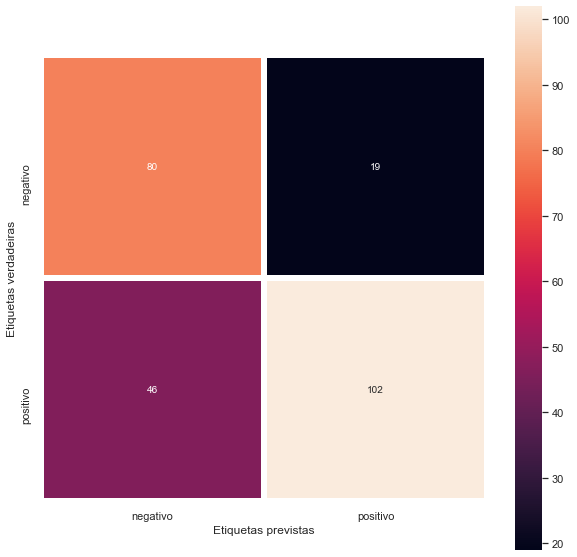

In [530]:
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize = (10, 10))
    ax = sns.heatmap(cmatrix.T,
                    square = True,
                     annot = True,
                    fmt = "d", 
                    cbar = True, 
                     linewidths=5,
                    xticklabels = ["negativo", "positivo"], yticklabels = ["negativo", "positivo"],
                    cmap = None)
plt.ylabel("Etiquetas verdadeiras")
plt.xlabel("Etiquetas previstas")

####  <span style = "color:red">Código Original.</span>
<!---
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize = (10, 10))
    ax = sns.heatmap(mat.T,
                     square = True,
                     annot = True,
                     fmt = 'd',
                     cbar = True,
                     xticklabels=['negativo','positivo'], 
                     yticklabels=['negativo','positivo'],
                     cmap = None
                    )

plt.ylabel('Etiquetas verdadeiras')
plt.xlabel('Etiquetas previstas');
-->

#### importe a biblioteca [`sklearn.metrics.accuracy_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) e realize a subsequente confrontação dos resultados classificados e observados para a medida da acurácia das classificações. 

In [527]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, labels_previstas)

0.7368421052631579

####  <span style = "color:red">Código Original.</span>
<!---
# Primeiro, calculamos a precisão geral do modelo
from sklearn.metrics import accuracy_score
accuracy_score(y_test, labels_previstas)
-->